<a href="https://colab.research.google.com/github/javohiryoldashovBigData/Training_project_for_DL_Semantic_Segmentation/blob/main/Deep_Learning_SemanticSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import fastai
import torch
import numpy as np

print(f'{fastai.__version__}')
print(f'{torch.__version__}')

2.7.13
2.1.0+cu118


In [ ]:
from fastai.vision.all import *

path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/codes.txt')]

In [ ]:
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'

dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames = get_image_files(path/'images'),
                                              label_func = label_getter, codes = np.loadtxt(path/'codes.txt', dtype=str))

learn = unet_learner(dls, resnet34)

learn.fine_tune(12)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 148MB/s]


epoch,train_loss,valid_loss,time
0,2.744962,2.311504,00:10


epoch,train_loss,valid_loss,time
0,1.910595,1.468394,00:01
1,1.619698,1.328470,00:01
2,1.444911,1.242352,00:01
3,1.314155,1.179486,00:02
4,1.195492,0.920082,00:02
5,1.089296,0.814974,00:01
6,0.989961,0.753073,00:01
7,0.901409,0.735655,00:01
8,0.828570,0.719536,00:01
9,0.766333,0.711495,00:02


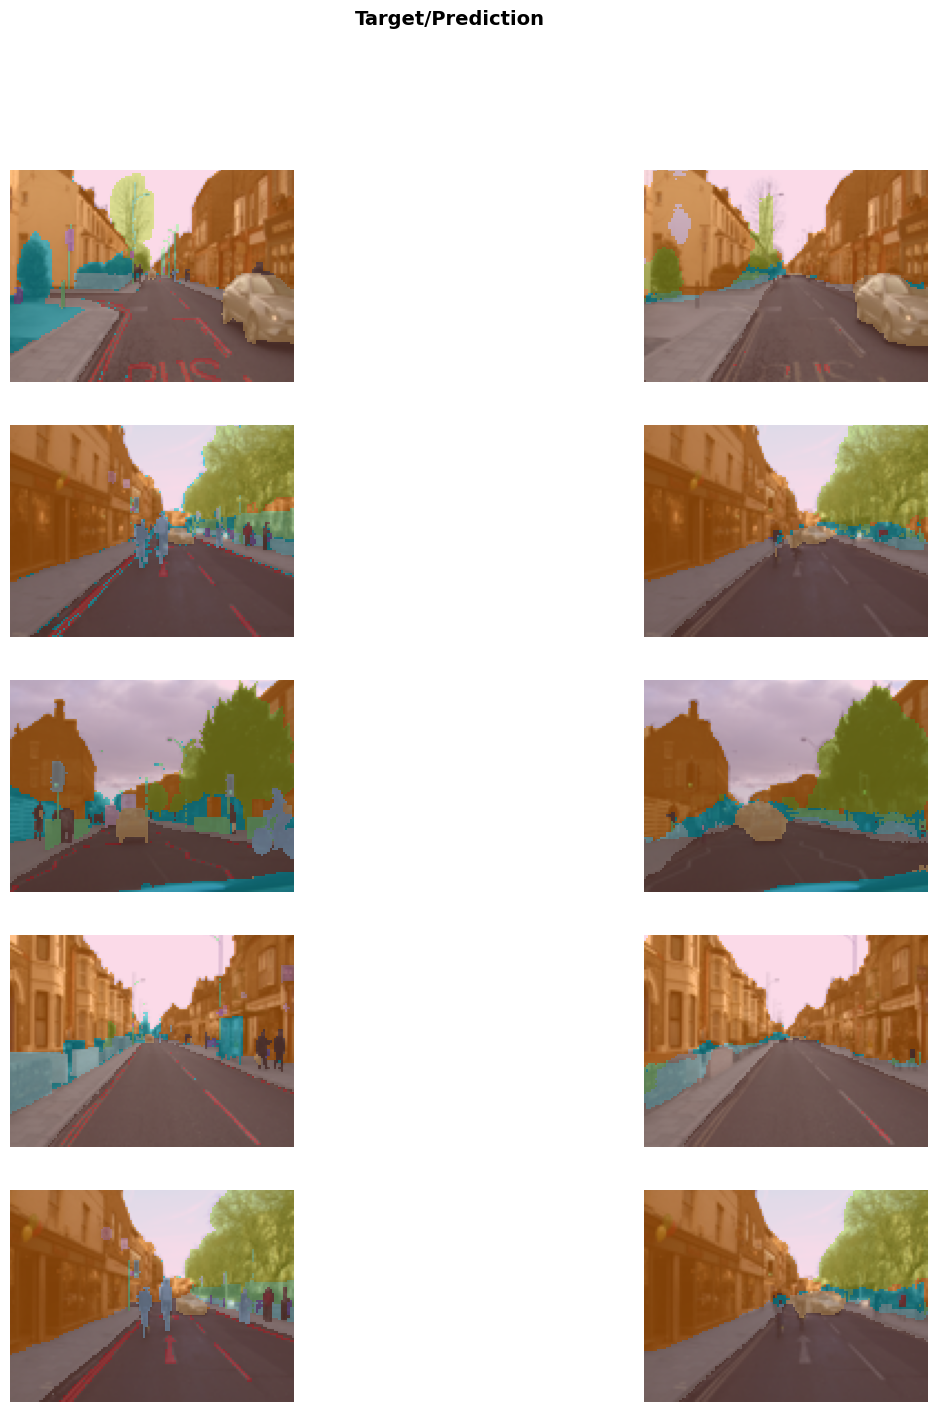

In [ ]:
learn.show_results(max_n=5, figsize=(15,16))